In [1]:
'''
We will compare the progression of cost function vs iteration for the below 3 cases:
1) full gradient descent
2) batch gradient descent
3) stochastic gradient descent

We will use the PCA- transformed data to keep the dimensionality to D=300
We will experiment with how each type of GD can converge and the cost-iteration plot 
'''

'\nWe will compare the progression of cost function vs iteration for the below 3 cases:\n1) full gradient descent\n2) batch gradient descent\n3) stochastic gradient descent\n\nWe will use the PCA- transformed data to keep the dimensionality to D=300\nWe will experiment with how each type of GD can converge and the cost-iteration plot \n'

In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/DS:Deep Learning in Python/Digit Recognizer')

In [0]:
from __future__ import print_function, division
from builtins import range
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime

from util import get_transformed_data, forward, error_rate, cost, gradW, gradb, y2indicator

Reading in and transforming data


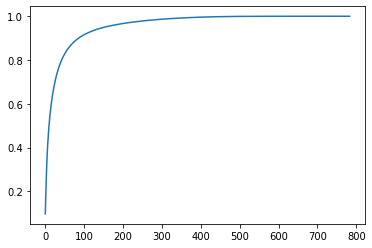

Performing logistic regression..
Cost at iteration 0: 1018.669716
Error rate: 0.259
Cost at iteration 10: 367.853937
Error rate: 0.092
Cost at iteration 20: 323.352328
Error rate: 0.084
Cost at iteration 30: 304.642014
Error rate: 0.082
Cost at iteration 40: 293.907949
Error rate: 0.079
Final error rate: 0.077
Elapsed time for Full GD: 0:00:05.484104
Cost of iteration 0: 2733.445065
Error rate: 0.894
Cost of iteration 10: 2449.283347
Error rate: 0.842
Cost of iteration 20: 2195.856118
Error rate: 0.765
Cost of iteration 30: 1970.792927
Error rate: 0.667
Cost of iteration 40: 1776.792704
Error rate: 0.552
Final error rate: 0.468
Time elapsed for SGD: 0:00:50.768551
Cost of iteration 0: 1191.208056
Error rate 0.296
Cost of iteration 10: 376.579532
Error rate 0.093
Cost of iteration 20: 326.186842
Error rate 0.082
Cost of iteration 30: 305.990373
Error rate 0.081
Cost of iteration 40: 294.682289
Error rate 0.077
Final error rate: 0.076
Elapsed time for batch gradient descent: 0:00:17.8002

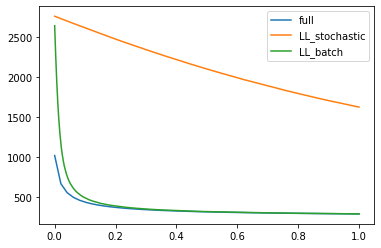

In [22]:
def main():
    Xtrain, Xtest, Ytrain, Ytest = get_transformed_data()
    print('Performing logistic regression..')

    N, D = Xtrain.shape
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)

    # 1.Full gradient descent
    W = np.random.randn(D, 10)/np.sqrt(D)
    b = np.zeros(10)
    LL = []
    lr = 0.0001
    reg = 0.01
    t0 = datetime.now()
    for i in range(50):
        p_y = forward(Xtrain, W, b)

        W += lr*(gradW(Ytrain_ind, p_y, Xtrain) - reg*W)
        b += lr*(gradb(Ytrain_ind, p_y) - reg*b)

        p_y_test = forward(Xtest, W, b)
        ll = cost(p_y_test, Ytest_ind)
        LL.append(ll)
        if i % 1 == 0:
            err = error_rate(p_y_test, Ytest)
            if i % 10 ==0:
                print(f"Cost at iteration {i}: {ll:0.6f}")
                print('Error rate:', err)
    p_y = forward(Xtest, W, b)
    print(f'Final error rate: {error_rate(p_y, Ytest)}')
    print(f'Elapsed time for Full GD: {datetime.now() - t0}')

    # 2.Stochastic Gradient descent
    W = np.random.randn(D, 10) /np.sqrt(D)
    b = np.zeros(10)
    LL_stochastic = []
    lr = 0.0001
    reg = 0.01

    t0 = datetime.now()
    for i in range(50):
        tmpX, tmpY = shuffle(Xtrain, Ytrain_ind)
        for n in range(min(N, 500)): 
            x = tmpX[n, :].reshape(1, D)
            y = tmpY[n, :].reshape(1,10)
            p_y = forward(x, W, b)

            W += lr*(gradW(y, p_y, x) - reg*W)
            b += lr*(gradb(y, p_y) -  reg*b)

            p_y_test = forward(Xtest, W, b)
            ll = cost(p_y_test, Ytest_ind)
            LL_stochastic.append(ll)

        if i%1 == 0:
            err = error_rate(p_y_test, Ytest)
            if i%10 == 0:
                print(f'Cost of iteration {i}: {ll:.6f}')
                print(f'Error rate: {err}')

    p_y = forward(Xtest, W, b)
    print(f'Final error rate: {error_rate(p_y, Ytest)}')
    print(f'Time elapsed for SGD: {datetime.now() - t0}')

    #3.batch Gradient Descent
    W = np.random.randn(D, 10) /np.sqrt(D)
    b = np.zeros(10)
    LL_batch = []
    lr =0.0001
    reg = 0.01
    batch_sz = 500
    n_batches = N //batch_sz

    t0 = datetime.now()
    for i in range(50):
        tmpx, tmpy = shuffle(Xtrain, Ytrain_ind)
        for j in range(n_batches):
            x = tmpX[j*batch_sz:(j*batch_sz+batch_sz), :]
            y = tmpY[j*batch_sz:(j*batch_sz+batch_sz), :]
            p_y = forward(x,W,b)

            W += lr*(gradW(y, p_y, x) - reg*W)
            b += lr*(gradb(y, p_y) - reg*b)

            p_y_test = forward(Xtest, W, b)
            ll = cost(p_y_test, Ytest_ind)
            LL_batch.append(ll)
        if i % 1 == 0:
            err = error_rate(p_y_test, Ytest)
            if i % 10 ==0:
                print(f'Cost of iteration {i}: {ll:.6f}')
                print(f'Error rate', err)
    
    p_y = forward(Xtest, W, b)
    print(f"Final error rate: {error_rate(p_y, Ytest)}")
    print(f"Elapsed time for batch gradient descent: {datetime.now() - t0}")

    x1 = np.linspace(0,1, len(LL))
    plt.plot(x1, LL, label='full')
    x2 = np.linspace(0,1, len(LL_stochastic))
    plt.plot(x2, LL_stochastic, label='LL_stochastic')
    x3 = np.linspace(0,1, len(LL_batch))
    plt.plot(x3, LL_batch, label='LL_batch')
    plt.legend()
    plt.show()
    

if __name__ == '__main__':
    main()













